In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AliHaider20/AIM-5001/main/Feature%20engineering/Car.csv", header=None)
df.columns= ["Symboling", "Normalized_losses", "Make", "Fuel_type", "Aspiration", "Ndoors", "Body_style",
             "Drive_wheels", "Engine_Location", "Wheel_base", "Length", "Width", "Height", "Curb_weight",
             "Engine_type", "NCylinders", "Engine_size", "Fuel_system", "Bore","Stroke","Compression_ratio",
             "Horsepower", "Peak_rpm", "City_mpg", "Highway_mpg", "Price"]
df.head()

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Ndoors,Body_style,Drive_wheels,Engine_Location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.replace("?", np.NaN, inplace=True) # Replacing ? to NaN values to make it easier to identify Null values.
df.isna().sum()/len(df)

Symboling            0.000000
Normalized_losses    0.200000
Make                 0.000000
Fuel_type            0.000000
Aspiration           0.000000
Ndoors               0.009756
Body_style           0.000000
Drive_wheels         0.000000
Engine_Location      0.000000
Wheel_base           0.000000
Length               0.000000
Width                0.000000
Height               0.000000
Curb_weight          0.000000
Engine_type          0.000000
NCylinders           0.000000
Engine_size          0.000000
Fuel_system          0.000000
Bore                 0.019512
Stroke               0.019512
Compression_ratio    0.000000
Horsepower           0.009756
Peak_rpm             0.009756
City_mpg             0.000000
Highway_mpg          0.000000
Price                0.019512
dtype: float64

In [4]:
# If I impute 20% Normlized loss feature which is 20% the dataset will become biased.
df.drop("Normalized_losses", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Make               205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   Aspiration         205 non-null    object 
 4   Ndoors             203 non-null    object 
 5   Body_style         205 non-null    object 
 6   Drive_wheels       205 non-null    object 
 7   Engine_Location    205 non-null    object 
 8   Wheel_base         205 non-null    float64
 9   Length             205 non-null    float64
 10  Width              205 non-null    float64
 11  Height             205 non-null    float64
 12  Curb_weight        205 non-null    int64  
 13  Engine_type        205 non-null    object 
 14  NCylinders         205 non-null    object 
 15  Engine_size        205 non-null    int64  
 16  Fuel_system        205 non

In [6]:
df.describe()

,Symboling,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Compression_ratio,City_mpg,Highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


##### Splitting data into numeric and categorical dataframes.

In [7]:
df[['Bore', 'Stroke', 'Horsepower', 'Peak_rpm', "Price"]] = df[['Bore', 'Stroke', 'Horsepower', 'Peak_rpm', "Price"]].astype(float)
cat = df.select_dtypes("object")
num = df.select_dtypes(exclude="object")

cat.head()

,Make,Fuel_type,Aspiration,Ndoors,Body_style,Drive_wheels,Engine_Location,Engine_type,NCylinders,Fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


It can be seen that Bore, Stroke, Horsepower, Peak_rpm and Price are categorical but infact they
represent numeric data. Also, Ndoors, and NCylinders features can be converted to integer as it represents the count of doors.

In [8]:
doors = cat.Ndoors.replace({"four":4, 'two':2})
cylinders = cat.NCylinders.replace({"four":4, "six":6, "five":5, "eight":8, "two":2, "three":3, "twelve":12})
                                   
num = pd.concat([num, doors, cylinders], axis=1)
cat.drop(["Ndoors", "NCylinders"], axis=1, inplace=True)
num.head()

,Symboling,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price,Ndoors,NCylinders
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,2.0,4
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,2.0,4
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,2.0,6
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4.0,4
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,4.0,5


# <center> Exploratory Data Analysis </center>

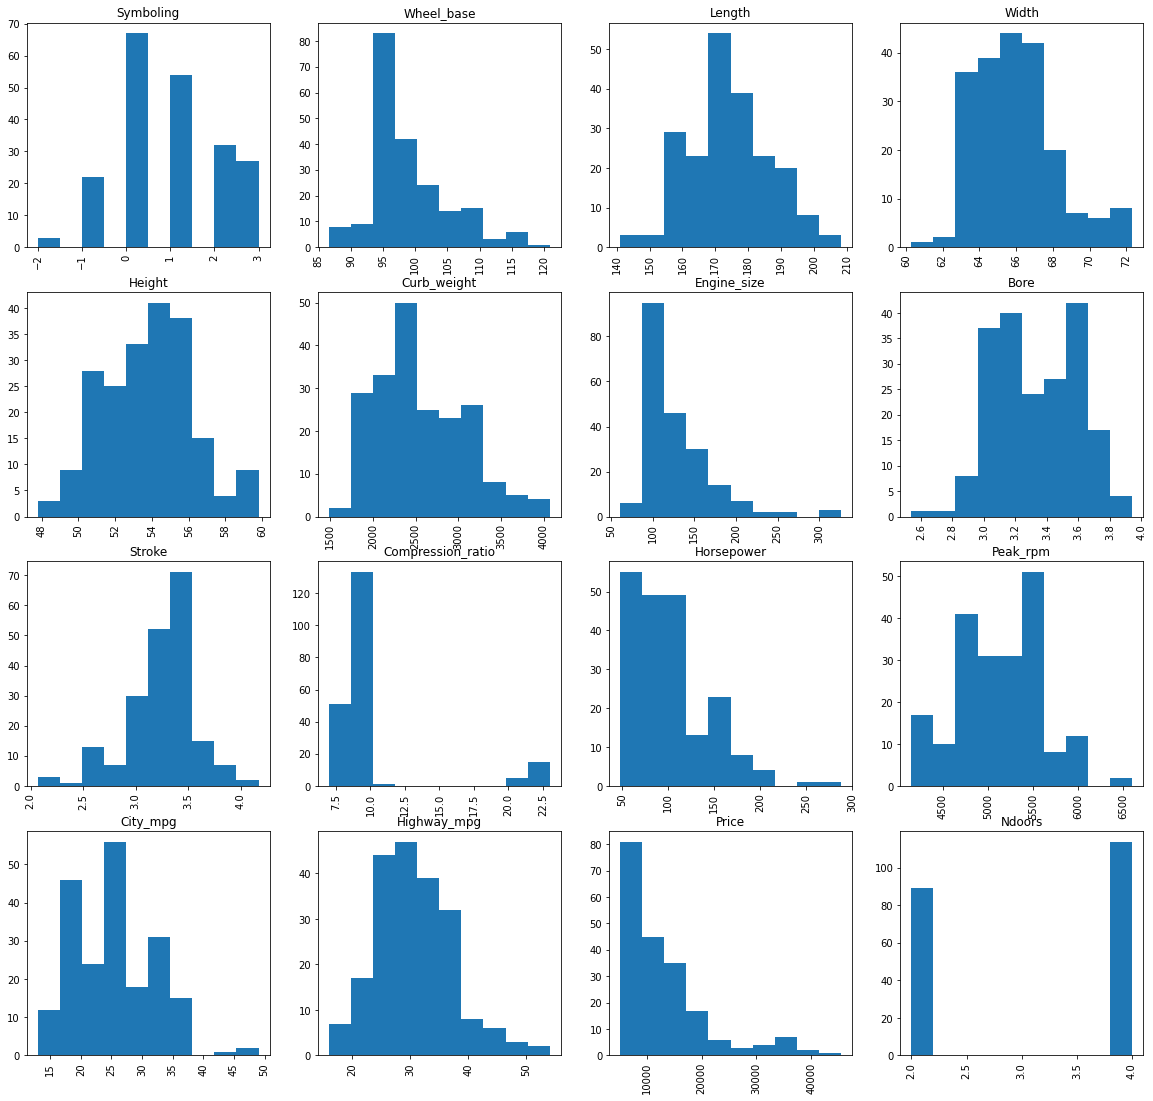

In [9]:
cols = list(num.columns)
plt.figure(figsize=(20, 19))
for i in range(1, len(cols)):
    plt.subplot(4, 4, i)
    plt.title(cols[i-1])
    plt.hist(num.iloc[:, i-1])
    plt.xticks(rotation=90)

## Observations
- There are very less amount of cars which reaches the 6500 RPM, 250 Horsepower, 

#### Correlation of features with Price feature.

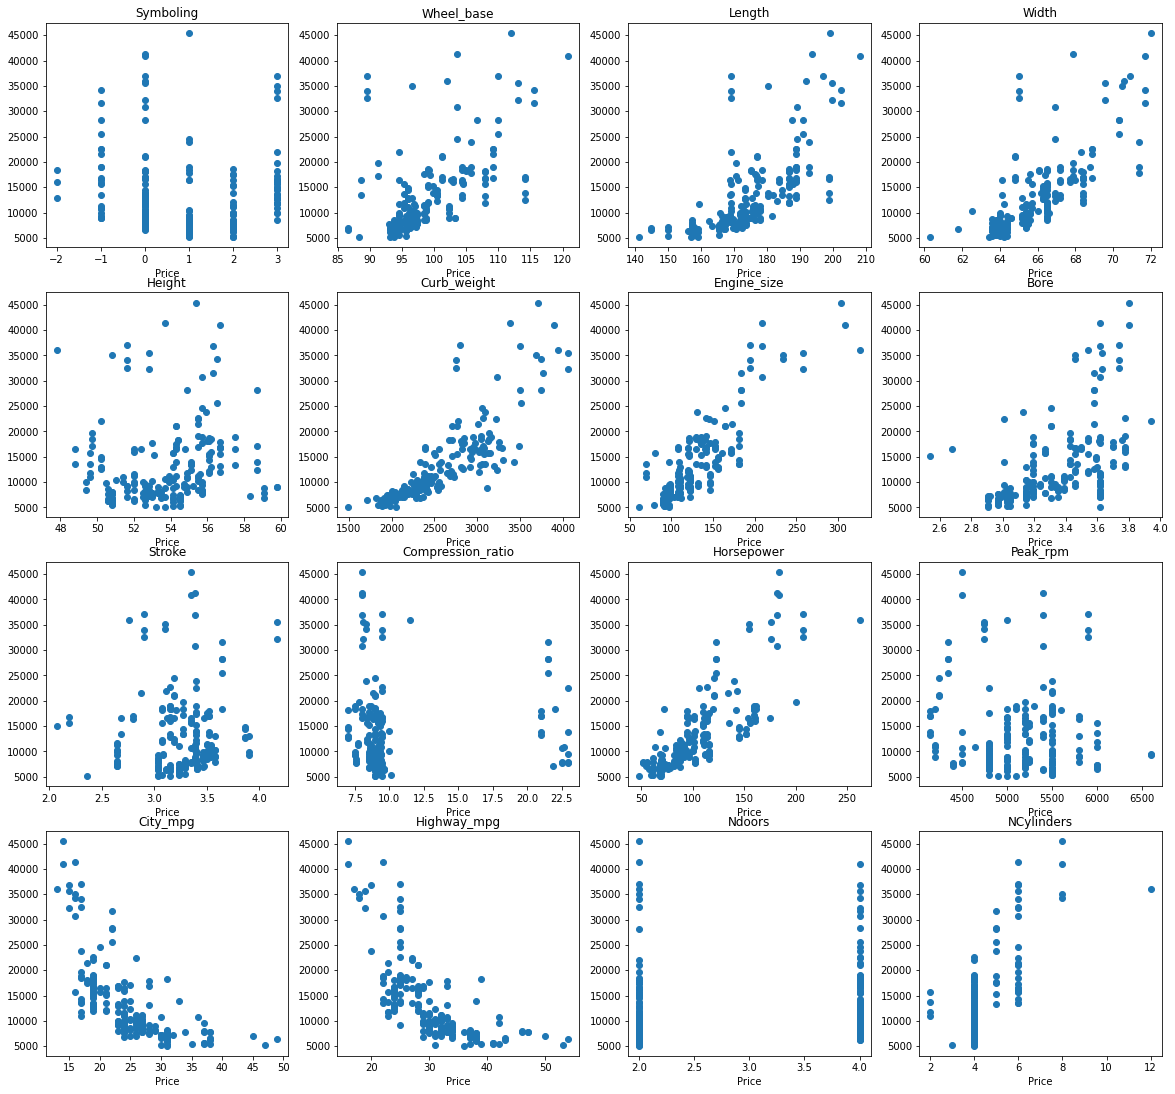

In [10]:
cols.remove("Price")
plt.figure(figsize=(20, 19))
for i in range(1, len(cols)+1):
    plt.subplot(4, 4, i)
    plt.title(cols[i-1])
    plt.xlabel("Price")
    plt.scatter(num.loc[:, cols[i-1]], num.Price)
#     plt.xticks(rotation=90)

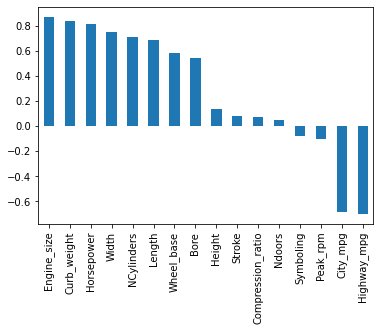

In [11]:
num.corr().Price.sort_values(ascending=False)[1:].plot(kind='bar');

#### Observations
- Sumboling, Height, Compression ratio, Ndoors, City mpg, Highway mpg doesn't seem to have a high impact on the Price feature.
- Engine size, Curb weight, and Horsepower have the highest impact on a car price.

## Categorical columns

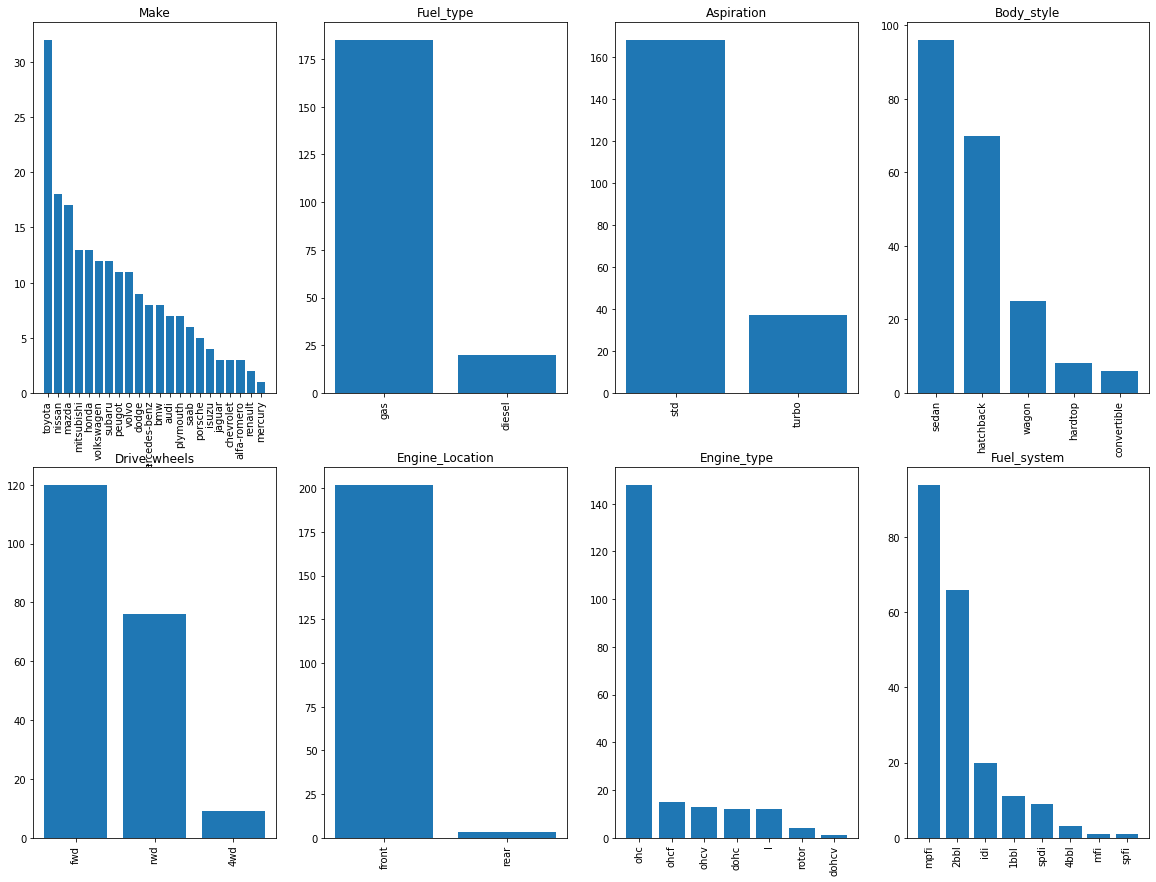

In [12]:
cols = cat.columns
plt.figure(figsize=(20, 15))
for i in range(1, len(cols)+1):
    plt.subplot(2, 4, i)
    plt.title(cols[i-1])
    plt.bar(cat.iloc[:, i-1].value_counts().index, cat.iloc[:, i-1].value_counts().values)
    plt.xticks(rotation=90)

#### Observations
- Most of the cars use gas rather than diesel as a Fuel.
- Toyota is the hihest used make model in the population of the dataset.
- More than 95 percent of cars use front side of the car for the Engine location.
- Most used body type ios Sedan and Hatchback.
- Most of the car uses MPFI, and 2BBL fuel systems.

# <center> Data Engineering.

### Replacing nan values in N Doors using correlation approach.

In [13]:
num[num.Ndoors.isna()].Price

27     8558.0
63    10795.0
Name: Price, dtype: float64

In [14]:
for i in range(8300, 8590):
    x = num[num.Price == i].Ndoors.values
    if len(x) > 0:
        print(x)
        print(i)
        break

[4.]
8358


In [15]:
num.iloc[81].Price

8499.0

In [16]:
num.loc[27, "Ndoors"] = num.iloc[81].Ndoors

In [17]:
for i in range(10975, 11200):
    x = num[num.Price == i].Ndoors.values
    if len(x) > 0:
        print(x)
        print(i)
        break
i-10975

[2.]
11048


73

In [18]:
for i in range(10975-73, 10975):
    x = num[num.Price == i].Ndoors.values
    if len(x) > 0:
        print(x)
        print(i)
        break
10975-i

[2.]
10945


30

In [19]:
num.loc[63, "Ndoors"] = num[num.Price==10945].Ndoors.values
num.Ndoors.isna().sum()

0

## Replacing nan values in Stroke using correlation approach.

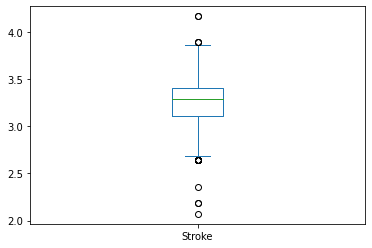

In [20]:
pd.to_numeric(num.Stroke[num.Stroke.notnull()]).plot(kind='box');

In [21]:
num[num.Stroke.isna()].Engine_size

55    70
56    70
57    70
58    80
Name: Engine_size, dtype: int64

In [22]:
for i in range(55,90):
    x = num[num.Engine_size == i].Stroke.values
    if len(x) > 0:
        print(x)
        print(i)

[3.03]
61
[nan nan nan]
70
[3.07]
79
[nan]
80


Since two values of the Stroke of Engine Size values are equidistant we'll take the round of the average Stroke values.

In [23]:
num.loc[55:58, "Stroke"] = round(3.03/3.07)

In [24]:
for i in range(70, 90):
    x = num[num.Engine_size == i].Stroke.values
    if len(x) > 0:
        print(x)
        print(i)

[1. 1. 1.]
70
[3.07]
79
[1.]
80


As there is only one value close to the missing point we replace it with that.

In [25]:
num.loc[58, "Stroke"] = 3.07

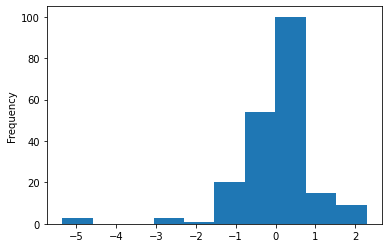

In [26]:
num.Stroke = pd.to_numeric(num.Stroke)
num.Stroke = (num.Stroke - num.Stroke.mean())/num.Stroke.std()
num.Stroke.plot(kind='hist');

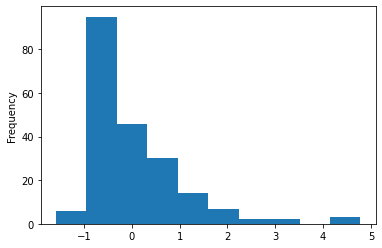

In [27]:
num.Engine_size = pd.to_numeric(num.Engine_size)
num.Engine_size = (num.Engine_size - num.Engine_size.mean())/num.Engine_size.std()
num.Engine_size.plot(kind='hist');

As we apply Standardization on the Stroke and the Engine Size features it doesn't change it's structure as there are many extreme values which can be called as potential outliers as they are 2 standard deviation away from the mean.

In [28]:
print("Indexes where Horsepower is null:", num[num.Horsepower.isna()].index)
print("Indexes where Peak RPM is null:", num[num.Peak_rpm.isna()].index)

Indexes where Horsepower is null: Int64Index([130, 131], dtype='int64')
Indexes where Peak RPM is null: Int64Index([130, 131], dtype='int64')


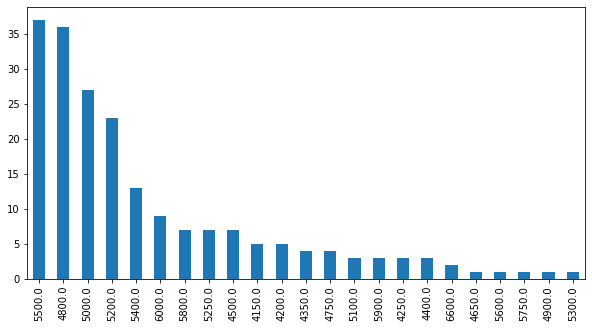

In [29]:
plt.figure(figsize=(10,5))
num.Peak_rpm.value_counts().plot(kind='bar');

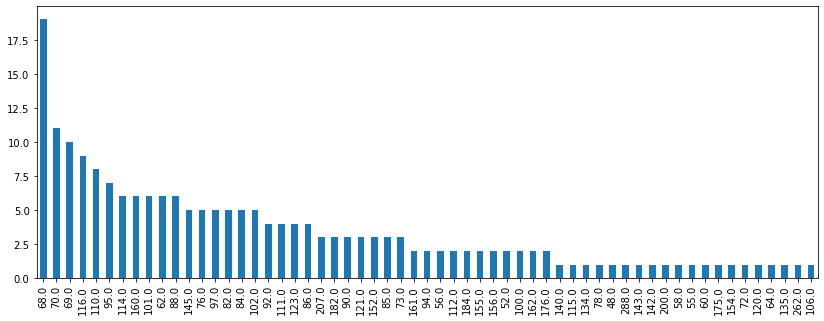

In [30]:
plt.figure(figsize=(14,5))
num.Horsepower.value_counts().plot(kind='bar');

## Replacing Null values in Horsepower and Peak RPM features using the mean value approach.

In [31]:
print("Mean of Horsepower:", pd.to_numeric(num.Horsepower).mean())
print("Mean of Peak RPM:", pd.to_numeric(num.Peak_rpm).mean())

Mean of Horsepower: 104.25615763546799
Mean of Peak RPM: 5125.369458128079


In [32]:
num.loc[130:132, "Horsepower"] = 104
num.loc[130:132, "Peak_rpm"] = 5125
num.isna().sum()

Symboling            0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_size          0
Bore                 4
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
Price                4
Ndoors               0
NCylinders           0
dtype: int64

## Replacing nan values in Bore feature using correlation approach.

I won't be imputing Price values as it is a dependent variable.

In [33]:
print(f"{num.corr()['Bore'].sort_values(ascending=False).index[1]} is highest correlated column with the Bore feature \
with value {num.corr()['Bore'].sort_values(ascending=False)[1]}")

Curb_weight is highest correlated column with the Bore feature with value 0.6490452703257742


In [34]:
num[num.Bore.isna()].Curb_weight

55    2380
56    2380
57    2385
58    2500
Name: Curb_weight, dtype: int64

We use the Bore vallue of the Curb weight 2385 to replace the value and for other 3 we use the mean value.


In [35]:
num.loc[57, "Bore"] = round(num[num.Curb_weight == 2385].Bore.mean(), 3)
num.Bore.fillna(num.Bore.mean(), inplace=True)
num.dropna(inplace=True) # Dropping the nan values in Price feature.
num.Bore.isna().sum()

0

# Working with categorical features.

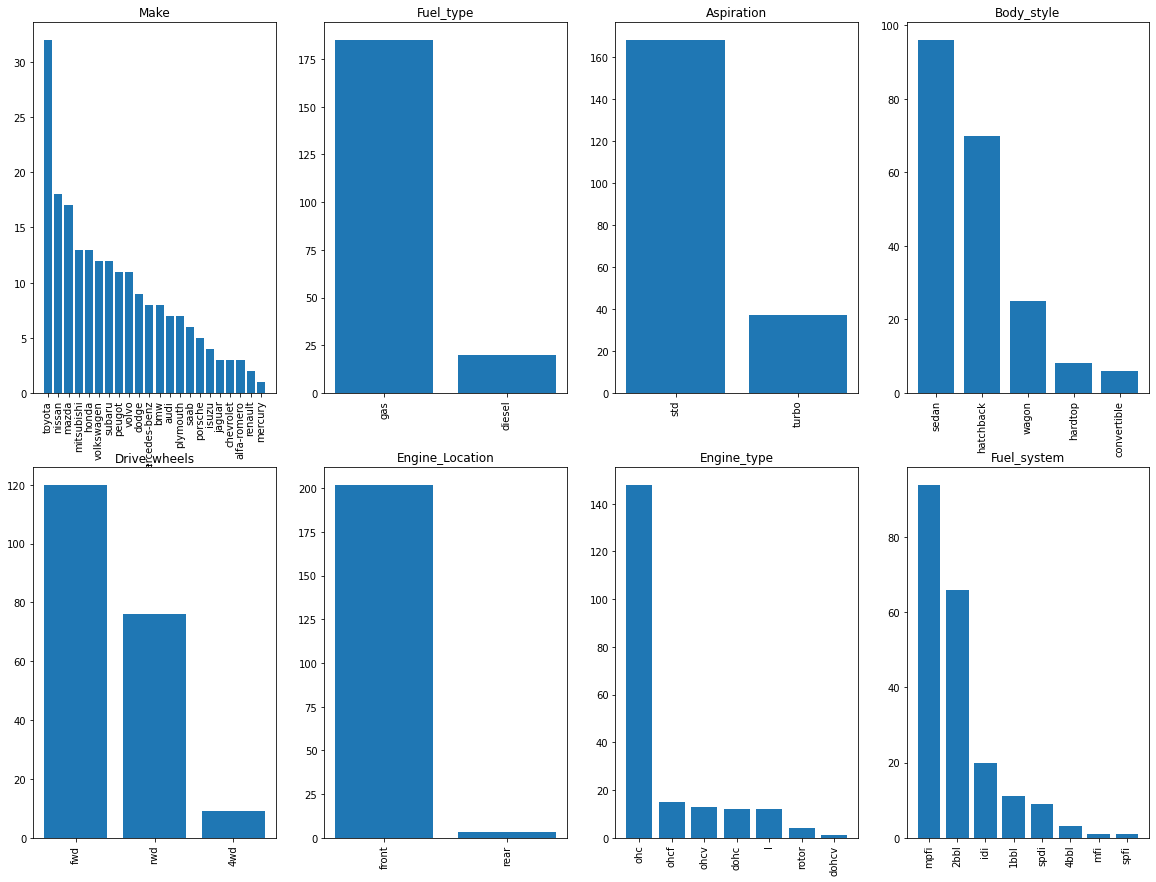

In [36]:
cols = cat.columns
plt.figure(figsize=(20, 15))
for i in range(1, len(cols)+1):
    plt.subplot(2, 4, i)
    plt.title(cols[i-1])
    plt.bar(cat.iloc[:, i-1].value_counts().index, cat.iloc[:, i-1].value_counts().values)
    plt.xticks(rotation=90)

#### Observations
- Most of the cars use gas rather than diesel as a Fuel.
- Toyota is the hihest used make model in the population of the dataset.
- More than 95 percent of cars use front side of the car for the Engine location.
- Most used body type ios Sedan and Hatchback.
- Most of the car uses MPFI, and 2BBL fuel systems.

In [37]:
# Labelencoding categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat = cat.apply(le.fit_transform)

# Combining both the dataframes
fdf = pd.concat([cat, num], axis=1) # Creating a final dataframe
fdf.dropna(inplace=True)
fdf.head()

,Make,Fuel_type,Aspiration,Body_style,Drive_wheels,Engine_Location,Engine_type,Fuel_system,Symboling,Wheel_base,...,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price,Ndoors,NCylinders
0,0,1,0,0,2,0,0,5,3.0,88.6,...,3.47,-1.305080,9.0,111.0,5000.0,21.0,27.0,13495.0,2.0,4.0
1,0,1,0,0,2,0,0,5,3.0,88.6,...,3.47,-1.305080,9.0,111.0,5000.0,21.0,27.0,16500.0,2.0,4.0
2,0,1,0,2,2,0,5,5,1.0,94.5,...,2.68,0.598872,9.0,154.0,5000.0,19.0,26.0,16500.0,2.0,6.0
3,1,1,0,3,1,0,3,5,2.0,99.8,...,3.19,0.430167,10.0,102.0,5500.0,24.0,30.0,13950.0,4.0,4.0
4,1,1,0,3,0,0,3,5,2.0,99.4,...,3.19,0.430167,8.0,115.0,5500.0,18.0,22.0,17450.0,4.0,5.0


## <center> Model building

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn import svm

X = fdf.drop("Price", axis=1)
y = fdf.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)
r2 = lambda model: r2_score(y_test, model.predict(X_test)) # Creating a function to calculate r2_score

In [39]:
# Base models
lr = LinearRegression().fit(X_train, y_train)
print("Linear Regression R2 score:", r2(lr))

svr = svm.SVR(kernel='linear').fit(X_train, y_train)
print("Support Vector Regressor R2 score:", r2(svr))

gbr = GradientBoostingRegressor(max_features="auto", learning_rate=0.5).fit(X_train, y_train)
print("Gradient boosting regressor R2 score:", r2(gbr))

Linear Regression R2 score: 0.7465345735006357
Support Vector Regressor R2 score: 0.7686644534720715
Gradient boosting regressor R2 score: 0.8943684648801183


In [50]:
# Hper-parameter tuning the Gradient boosting model.
params = [{'max_features': ["auto", "sqrt", "log2"],
         'learning_rate': [0.3, 0.4, 0.5, 0.6],
         'n_estimators': [100, 300, 500],
           "alpha": [0.4, 0.6, 0.9],
           "max_depth": [3, 4, 5, 6],
          }]

gs_gbr = GridSearchCV(gbr,
                      param_grid=params,
                      scoring='r2',
                      cv=6)
gs_gbr.fit(X_train, y_train)
print("Best estimator:", gs_gbr.best_estimator_)
print("Best score:", gs_gbr.best_score_)

Best estimator: GradientBoostingRegressor(learning_rate=0.3, max_depth=5, max_features='sqrt',
                          n_estimators=500)
Best score: 0.9363545169293618


In [51]:
gs_gbr.best_params_

{'alpha': 0.9,
 'learning_rate': 0.3,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [45]:
# Best fit model
print("Predicting price for a car with features:", X_test.iloc[0])
print("Price:", gs_gbr.predict([X_test.iloc[0]])[0])

Predicting price for a car with features: Make                   12.000000
Fuel_type               1.000000
Aspiration              0.000000
Body_style              3.000000
Drive_wheels            1.000000
Engine_Location         0.000000
Engine_type             3.000000
Fuel_system             1.000000
Symboling               0.000000
Wheel_base             97.200000
Length                173.400000
Width                  65.200000
Height                 54.700000
Curb_weight          2302.000000
Engine_size            -0.165871
Bore                    3.330000
Stroke                  0.598872
Compression_ratio       8.500000
Horsepower             97.000000
Peak_rpm             5200.000000
City_mpg               27.000000
Highway_mpg            34.000000
Ndoors                  4.000000
NCylinders              4.000000
Name: 100, dtype: float64
Price: 8656.616039134231


# 5: Dimensionality Reduction Analysis.

### Using PCA to reduce the dimension and get 95% information from the dataset.

#### Before applying PCA we need to remove the Null values as PCA doesn't work on Null values and convert string values to integer values.

In [42]:
from sklearn.decomposition import PCA
pca = PCA(5)
principalComponents = pca.fit_transform(fdf)
print(principalComponents[0])

[ 287.76621417 -103.39439921   55.4426698    11.86476691   13.05383196]
